# Question 5 - Use the available variables to construct a model that predicts delays. 

## Importing Packages

In [1]:
# Importing the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report

## Importing the Datasets

In [2]:
# Importing the main cleaned dataset
cleaned_df = pd.read_csv("Files/Cleaned_Dataset.csv")
# Importing the Plane Data
plane_df = pd.read_csv("Files/plane-data.csv")

In [3]:
# Changing the setting to show all columns and showing first and last 5 rows pf the main dataset
pd.set_option("display.max_columns", None)
cleaned_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14268890,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,N670DN,111.0,91.0,80.0,13.0,-7.0,MCO,ATL,403,14,17,0,0,0,0,0,0,0
14268891,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,N829MH,248.0,254.0,221.0,5.0,11.0,ATL,SLC,1589,6,21,0,0,0,0,0,0,0
14268892,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,N623DL,266.0,250.0,233.0,15.0,-1.0,LAX,ATL,1946,14,19,0,0,0,0,15,0,0
14268893,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,N970DL,125.0,127.0,100.0,36.0,38.0,DFW,ATL,732,11,14,0,0,0,0,0,0,36


In [4]:
# Showing first and last 5 rows of the plane dataset
plane_df

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998


##### ArrDelay will be our target variable to since we want to predict delays

In [5]:
# Creating a new column "PresenceOfArrivalDelay", if the "ArrDelay" is greater than 0 "Present" is entered and if not "Absent" 
cleaned_df["PresenceOfArrivalDelay"] = cleaned_df["ArrDelay"].apply(lambda x: "Present" if x>0 else "Absent")

In [6]:
# Filtering to keep only the neccessary columns in the plane dataset
plane_df_filtered = plane_df.filter(["tailnum", "year"])
plane_df_filtered

,tailnum,year
0,N050AA,NaN
1,N051AA,NaN
2,N052AA,NaN
3,N054AA,NaN
4,N055AA,NaN
...,...,...
5024,N997DL,1992
5025,N998AT,2002
5026,N998DL,1992
5027,N999CA,1998


In [7]:
# Checking for null values in the filtered plane dataset
plane_df_filtered.isnull().sum()

tailnum      0
year       549
dtype: int64

In [8]:
# Dropping all rows with null values
plane_df_filtered = plane_df_filtered.dropna(axis = 0)
plane_df_filtered

,tailnum,year
34,N10156,2004
35,N102UW,1998
36,N10323,1986
37,N103US,1999
38,N104UA,1998
...,...,...
5024,N997DL,1992
5025,N998AT,2002
5026,N998DL,1992
5027,N999CA,1998


In [9]:
# Showing general information about the filtered plane data to check if data has been cleaned properly
plane_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4480 entries, 34 to 5028
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tailnum  4480 non-null   object
 1   year     4480 non-null   object
dtypes: object(2)
memory usage: 105.0+ KB


##### We can see that the "year" columns' data type is object which suggests uncleaned data as the data type should be integer

In [10]:
# Getting the value counts for the "year" column
plane_df_filtered["year"].value_counts()

2001    389
2000    341
1999    320
2002    306
2003    266
1998    248
2004    240
2005    193
1991    156
2006    152
1988    148
1992    146
None    145
1990    145
1997    134
1987    131
1989    110
1996    109
2007    107
1994    103
1995    101
1993    100
1986     92
1985     84
2008     37
1984     27
1968     24
1983     18
1967     16
1969     12
1979     11
1975     10
1980      8
1976      8
1978      8
1977      6
1982      6
0000      3
1973      3
1959      2
1963      2
1974      2
1970      2
1956      1
1972      1
1962      1
1957      1
1964      1
1965      1
1946      1
1966      1
1971      1
Name: year, dtype: int64

##### We can see that there are values "None" and "0000" which needs to be removed

In [11]:
# Dropping "None" and "0000" from the "year" column
plane_df_filtered.drop(plane_df_filtered[(plane_df_filtered["year"] == "0000") | (plane_df_filtered["year"] == "None") ].index, inplace = True)
plane_df_filtered

C:\Users\asd27\AppData\Local\Temp\ipykernel_4900\291402948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_df_filtered.drop(plane_df_filtered[(plane_df_filtered["year"] == "0000") | (plane_df_filtered["year"] == "None") ].index, inplace = True)


,tailnum,year
34,N10156,2004
35,N102UW,1998
36,N10323,1986
37,N103US,1999
38,N104UA,1998
...,...,...
5024,N997DL,1992
5025,N998AT,2002
5026,N998DL,1992
5027,N999CA,1998


In [12]:
# Checking if None" and "0000" has been removed
plane_df_filtered["year"].value_counts()

2001    389
2000    341
1999    320
2002    306
2003    266
1998    248
2004    240
2005    193
1991    156
2006    152
1988    148
1992    146
1990    145
1997    134
1987    131
1989    110
1996    109
2007    107
1994    103
1995    101
1993    100
1986     92
1985     84
2008     37
1984     27
1968     24
1983     18
1967     16
1969     12
1979     11
1975     10
1980      8
1976      8
1978      8
1977      6
1982      6
1973      3
1970      2
1974      2
1963      2
1959      2
1966      1
1946      1
1964      1
1972      1
1962      1
1956      1
1957      1
1965      1
1971      1
Name: year, dtype: int64

In [13]:
# Converting the data type of the "year" column to integer
plane_df_filtered["year"] = plane_df_filtered["year"].astype(int)

C:\Users\asd27\AppData\Local\Temp\ipykernel_4900\1610605110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_df_filtered["year"] = plane_df_filtered["year"].astype(int)


In [14]:
# Checking if the data type has been converted
plane_df_filtered.dtypes

tailnum    object
year        int32
dtype: object

##### The common column we want to merge on is the TailNum, but the column name differs between the two dataframes

In [15]:
# Changing the "tailnum" column in the filtered plane dataframe to "TailNum" to make merging possible
plane_df_filtered.rename(columns = {"tailnum":"TailNum"}, inplace = True)
plane_df_filtered

C:\Users\asd27\AppData\Local\Temp\ipykernel_4900\3616773495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_df_filtered.rename(columns = {"tailnum":"TailNum"}, inplace = True)


,TailNum,year
34,N10156,2004
35,N102UW,1998
36,N10323,1986
37,N103US,1999
38,N104UA,1998
...,...,...
5024,N997DL,1992
5025,N998AT,2002
5026,N998DL,1992
5027,N999CA,1998


In [16]:
# Merging the two dataframes on the"TailNum" column
merged_df = pd.merge(cleaned_df, plane_df_filtered, on = ["TailNum"])
merged_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,PresenceOfArrivalDelay,year
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0,0,0,Present,1999
1,2006,1,11,3,1913.0,1912,2326.0,2331,US,9,N657AW,193.0,199.0,172.0,-5.0,1.0,PHX,ORD,1440,5,16,0,0,0,0,0,0,0,Absent,1999
2,2006,1,12,4,2355.0,2359,121.0,131,US,374,N657AW,86.0,92.0,58.0,-10.0,-4.0,LAS,OAK,407,5,23,0,0,0,0,0,0,0,Absent,1999
3,2006,1,12,4,724.0,729,1017.0,1019,US,182,N657AW,233.0,230.0,200.0,-2.0,-5.0,ORD,PHX,1440,24,9,0,0,0,0,0,0,0,Absent,1999
4,2006,1,12,4,1305.0,1300,1848.0,1850,US,570,N657AW,223.0,230.0,207.0,-2.0,5.0,PHX,TPA,1788,5,11,0,0,0,0,0,0,0,Absent,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11558100,2007,12,30,7,2003.0,2010,25.0,2345,B6,649,N665JB,442.0,395.0,376.0,40.0,-7.0,JFK,SFO,2586,14,52,0,0,0,0,40,0,0,Present,2007
11558101,2007,12,31,1,1943.0,1940,2120.0,2110,B6,5,N665JB,97.0,90.0,67.0,10.0,3.0,BUF,JFK,301,16,14,0,0,0,0,0,0,0,Present,2007
11558102,2007,12,31,1,1716.0,1720,1858.0,1901,B6,6,N665JB,102.0,101.0,61.0,-3.0,-4.0,JFK,BUF,301,4,37,0,0,0,0,0,0,0,Absent,2007
11558103,2007,12,31,1,2155.0,2150,59.0,100,B6,809,N665JB,184.0,190.0,165.0,-1.0,5.0,JFK,FLL,1069,4,15,0,0,0,0,0,0,0,Absent,2007


In [17]:
# Renaming 'year' to 'YearOfManufacture' in the merged dataset
merged_df.rename(columns={"year":"YearOfManufacture"}, inplace=True)
merged_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,PresenceOfArrivalDelay,YearOfManufacture
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0,0,0,Present,1999
1,2006,1,11,3,1913.0,1912,2326.0,2331,US,9,N657AW,193.0,199.0,172.0,-5.0,1.0,PHX,ORD,1440,5,16,0,0,0,0,0,0,0,Absent,1999
2,2006,1,12,4,2355.0,2359,121.0,131,US,374,N657AW,86.0,92.0,58.0,-10.0,-4.0,LAS,OAK,407,5,23,0,0,0,0,0,0,0,Absent,1999
3,2006,1,12,4,724.0,729,1017.0,1019,US,182,N657AW,233.0,230.0,200.0,-2.0,-5.0,ORD,PHX,1440,24,9,0,0,0,0,0,0,0,Absent,1999
4,2006,1,12,4,1305.0,1300,1848.0,1850,US,570,N657AW,223.0,230.0,207.0,-2.0,5.0,PHX,TPA,1788,5,11,0,0,0,0,0,0,0,Absent,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11558100,2007,12,30,7,2003.0,2010,25.0,2345,B6,649,N665JB,442.0,395.0,376.0,40.0,-7.0,JFK,SFO,2586,14,52,0,0,0,0,40,0,0,Present,2007
11558101,2007,12,31,1,1943.0,1940,2120.0,2110,B6,5,N665JB,97.0,90.0,67.0,10.0,3.0,BUF,JFK,301,16,14,0,0,0,0,0,0,0,Present,2007
11558102,2007,12,31,1,1716.0,1720,1858.0,1901,B6,6,N665JB,102.0,101.0,61.0,-3.0,-4.0,JFK,BUF,301,4,37,0,0,0,0,0,0,0,Absent,2007
11558103,2007,12,31,1,2155.0,2150,59.0,100,B6,809,N665JB,184.0,190.0,165.0,-1.0,5.0,JFK,FLL,1069,4,15,0,0,0,0,0,0,0,Absent,2007


## Creating a Correlation matrix for the variables

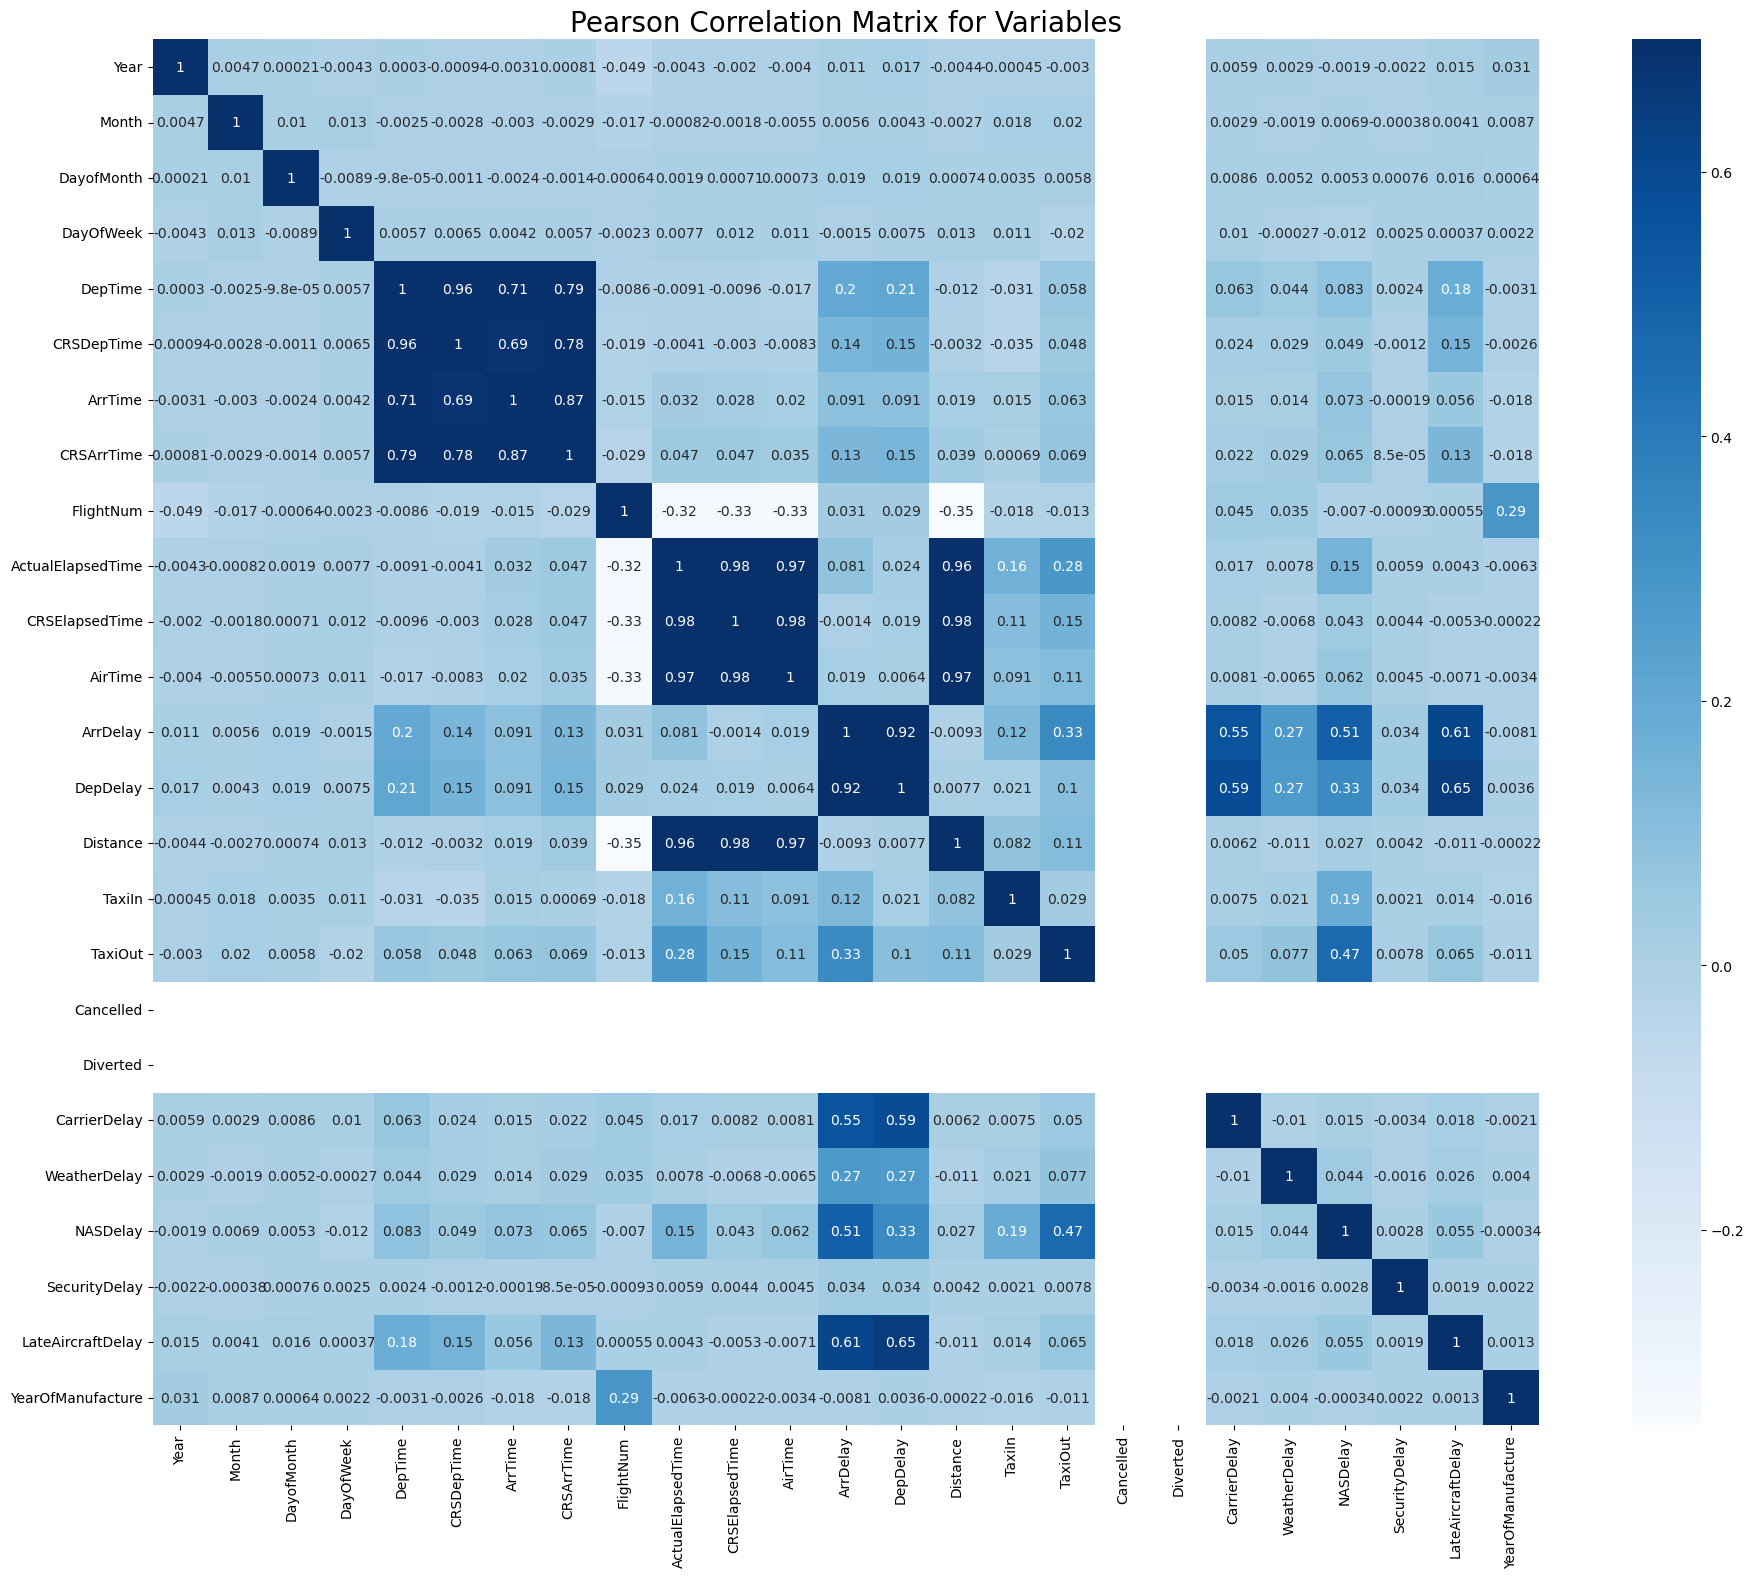

In [18]:
#Creating a pearson Correlation matrix for the variables
correlation_matrix = merged_df.corr("pearson")

f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(correlation_matrix, cmap="Blues", annot = True, vmax = .7, square=True)
ax.set_title("Pearson Correlation Matrix for Variables", size = 20)

# Saving the plot locally as a png
plt.savefig("Pearson Correlation Matrix for Variables.png")

# Showing the matrix
plt.show()

In [19]:
# Getting the value counts of "Cancelled"
merged_df["Cancelled"].value_counts()

0    11558105
Name: Cancelled, dtype: int64

In [20]:
# Getting the value counts of "Diverted"
merged_df["Diverted"].value_counts()

0    11558105
Name: Diverted, dtype: int64

In [21]:
# Checking for null values in the merged dataframe
merged_df.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
Diverted                  0
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
PresenceOfArrivalDelay    0
YearOfManufacture         0
dtype: int64

## Feature Selection

In [22]:
# The features that will be used to predict PresenceOfArrivalDelay
features = ["Month", "DayOfWeek", "DepDelay", "Origin", "Dest", "Distance", "TaxiOut"]

# Numerical Features
numerical_features = ["Distance", "DepDelay", "TaxiOut"]

# Categorical Features
categorical_features = ["Month", "DayOfWeek", "Origin", "Dest"]

In [23]:
# Creating a dataframe with only the required features
X = merged_df[features].copy()

In [24]:
# Creating a pipline to scale numerical data and impute missing values if any
numerical_transformer = Pipeline(steps=[ ("imputer", SimpleImputer()), ("scaler", StandardScaler())])

#  Creating a pipline to encode cateforical data and impute missing values if any
categorical_transformer = Pipeline(steps=[ ("imputer", SimpleImputer()), ("onehot", OneHotEncoder(handle_unknown='ignore'))])

## Building the Model

In [25]:
# Combining the numerical and categorical transformer pipelines
data_transformer = ColumnTransformer(transformers=[("categorical", categorical_transformer, categorical_features),
                                                   ("numerical", numerical_transformer, numerical_features)])

In [26]:
# Creating a pipeline with data transformation and logistic regression as the estimator
lr_model = Pipeline(steps=[("data_transformer", data_transformer), ("lr_model", LogisticRegression(max_iter=10000))])

##### Splitting the dataset into training and testing sets, where 70% of the data will be used for training and 30% will be used for testing

In [27]:
# Splitting and forming X and y training and test datasets and ensuring replicability by random seed
X_train, X_test, y_train, y_test = train_test_split(X, merged_df.PresenceOfArrivalDelay, test_size=0.3, random_state=1)

In [28]:
# Setting up the parameter grid
param_grid = {"data_transformer__numerical__imputer__strategy": ["mean", "median"],
              "data_transformer__categorical__imputer__strategy": ["constant","most_frequent"]}

# Hyperparameter tuning
grid_lr = GridSearchCV(lr_model, param_grid=param_grid, n_jobs=5)

# Fitting the model on the training data using the specified hyperparameters and training configuration
grid_lr.fit(X_train, y_train);

## Model Evaluation

### ROC Curve

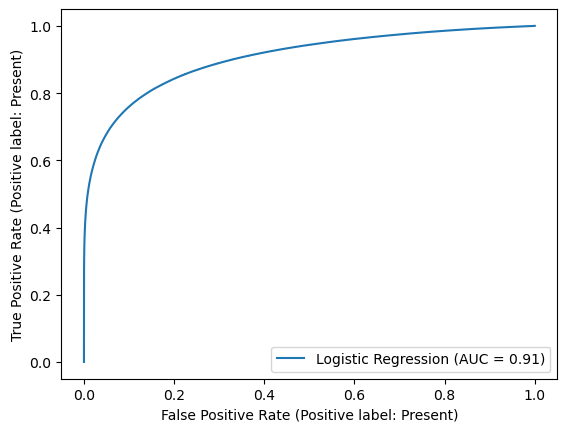

In [29]:
ax = plt.gca()

# Plotting the logistic regression ROC curve
metrics.RocCurveDisplay.from_estimator(grid_lr, X_test, y_test, ax = ax, pos_label = "Present", name = "Logistic Regression")

# Saving the it locally as a png
plt.savefig("ROC Curve.png")

# Showing the ROC Curve
plt.show()

### Confusion Matrix

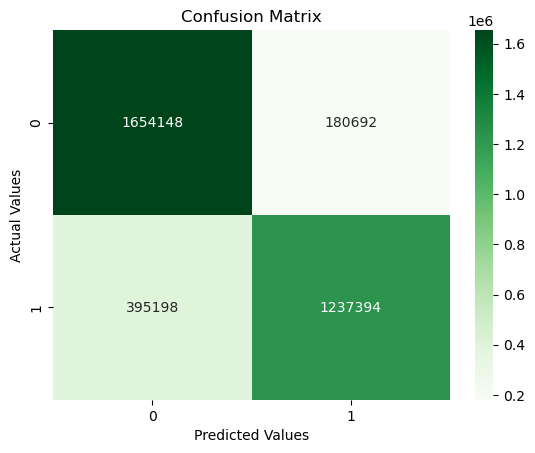

In [31]:
# Plotting a confusion matrix
y_pred = grid_lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
plt.title("Confusion Matrix")
sns.heatmap(cm, annot = True, fmt= "d" , cmap = "Greens")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

# Saving the plot locally as a png
plt.savefig("Confusion Matrix.png")

# Showing the matrix
plt.show()

##### Getting the accuracy of the confusion matrix

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Absent       0.81      0.90      0.85   1834840
     Present       0.87      0.76      0.81   1632592

    accuracy                           0.83   3467432
   macro avg       0.84      0.83      0.83   3467432
weighted avg       0.84      0.83      0.83   3467432



In [69]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8339145511721643